# **<blockquote style="color:#0047AB; font-family: Arial, sans-serif;">DATA SCIENCE INTERNSHIP</blockquote>**

## **<span style="color:#FF0000; font-family: Arial, sans-serif;">Task-4: EMAIL SPAM DETECTION</span>**

### **Name:** SUSHIL PRASAD BOOPATHY M

## **<span style="color:#00A300; font-family: Arial, sans-serif;">Problem Description</span>**

The Email Spam Identification Project seeks to address these challenges by developing a robust, accurate, and adaptable system that can efficiently differentiate between spam and legitimate emails while allowing users to customize their filtering preferences.

## **<span style="color:#AA00FF; font-family: Arial, sans-serif;">Objective</span>**
The "Spam Mail Detection" project seeks to deliver an intelligent, adaptable, and user-centric solution that effectively combats the persistent challenge of email spam, enhances email communication security, and improves the overall email experience for users across various platforms and languages.


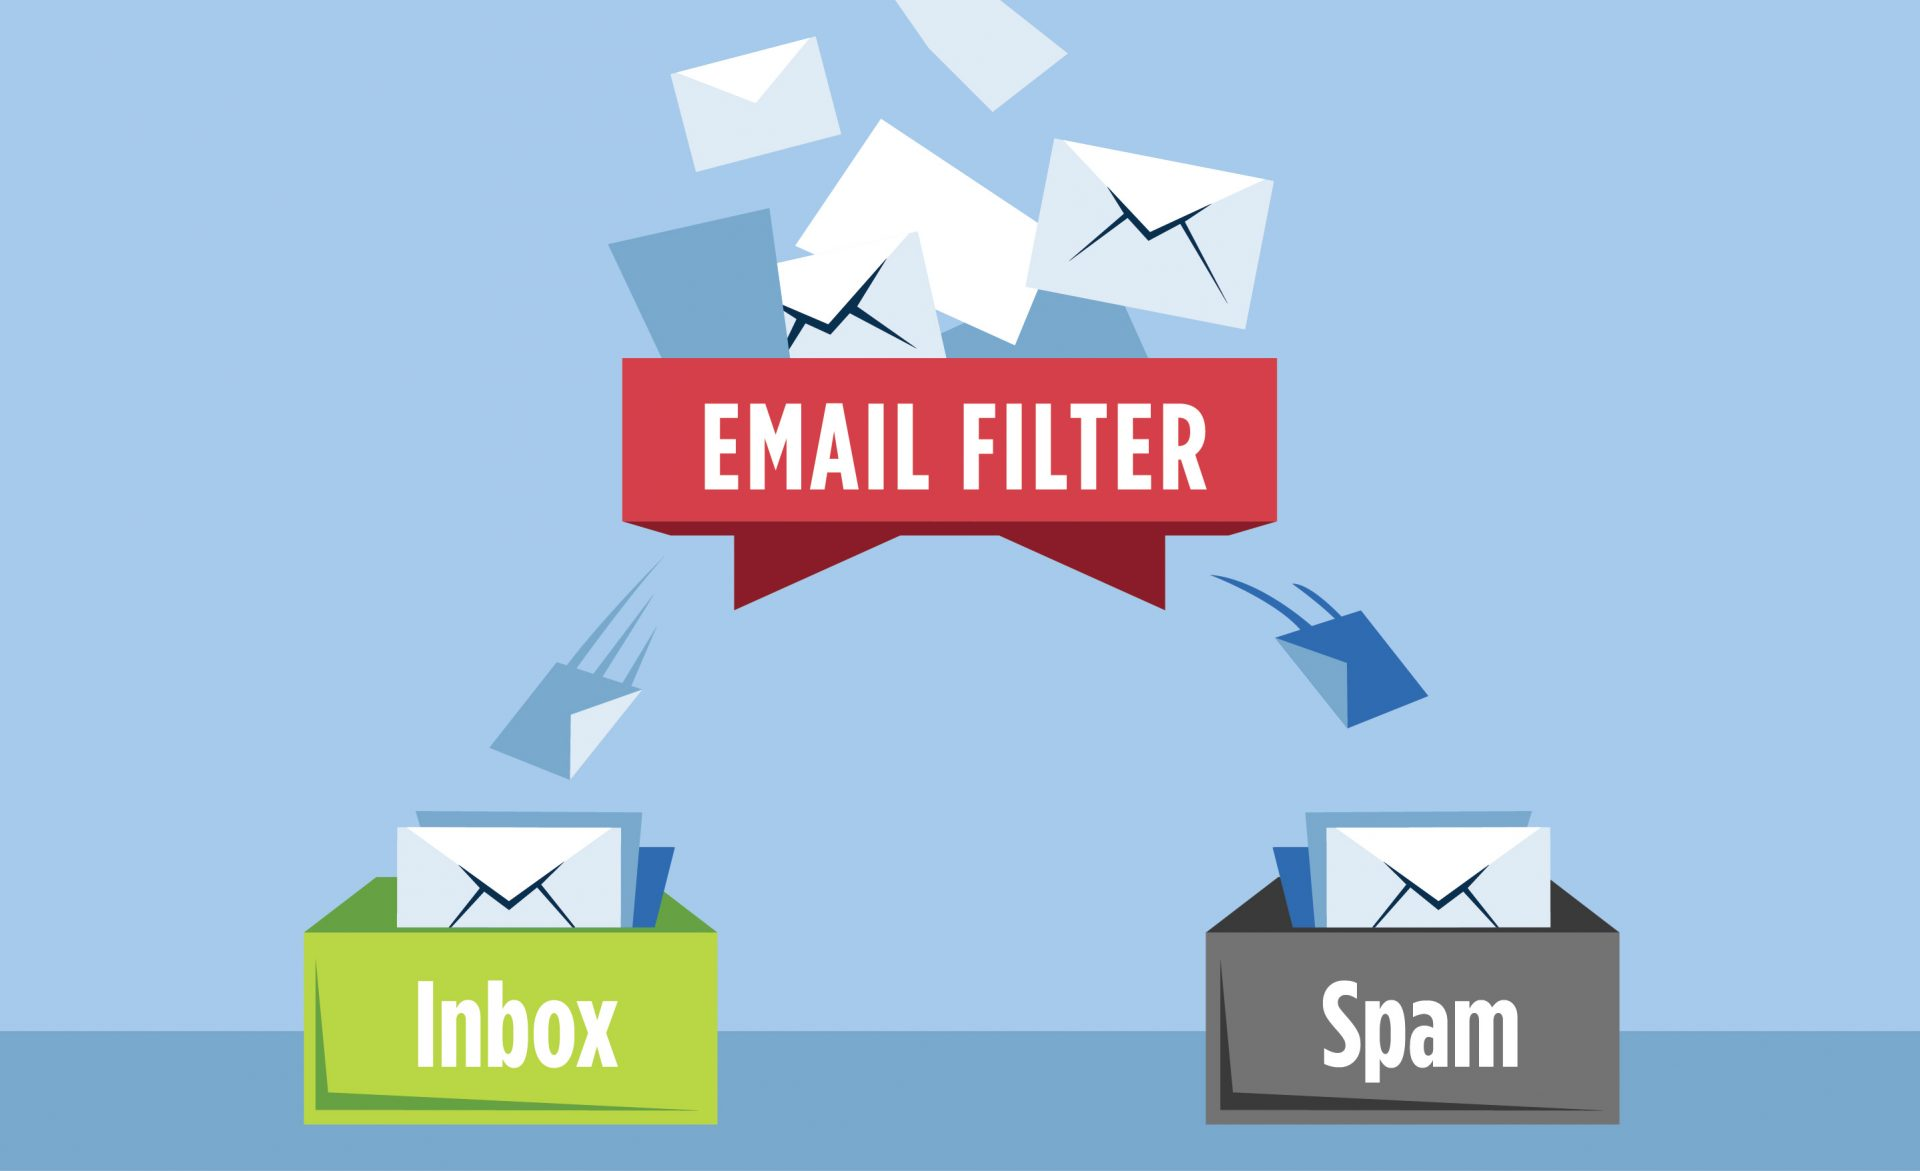


## <span style="color:#FF5733;">Importing the necessary libraries</span>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as colors
import datetime as dt
from collections import Counter
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.auto import tqdm
import time
from nltk.corpus import stopwords
from statistics import mode
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
! pip install --user xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable


## <span style="color:#FF5733;"> **Import & Reading Data File** </span>

In [252]:
data = pd.read_csv('spam.csv',encoding = 'latin1')


In [253]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## <span style="color:#FF5733;">Getting the dataset details</span>

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dataset has 4 columns from these V1 and V2 are the necessary columns with non nul values
other 2 unnamed columns were not necessary.

## <span style="color:#FF5733;">Dropping the unwanted columns </span>

In [255]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [256]:
data.sample(5)

,v1,v2
4795,spam,URGENT This is our 2nd attempt to contact U. Y...
246,ham,I asked you to call him now ok
1007,ham,I don't quite know what to do. I still can't g...
3910,ham,How i noe... She's in da car now... Later then...
4372,ham,Me fine..absolutly fine


In [257]:
df = pd.DataFrame(data)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## <span style="color:#FF5733;">Renaming the columns  </span>

In [258]:
df.rename(columns = {'v1':'Mail_type','v2':'Mails'},inplace = True)
df

,Mail_type,Mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## <span style="color:#FF5733;">checking the columns with null values  </span>

In [259]:
df.isna().sum()

Mail_type    0
Mails        0
dtype: int64

## <span style="color:#FF5733;"> Visualizing the mail_types by Bar and Pie chart </span>

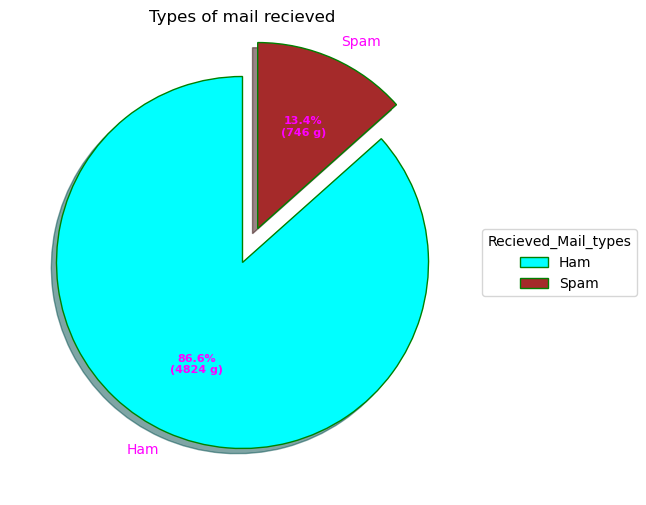

<Axes: >

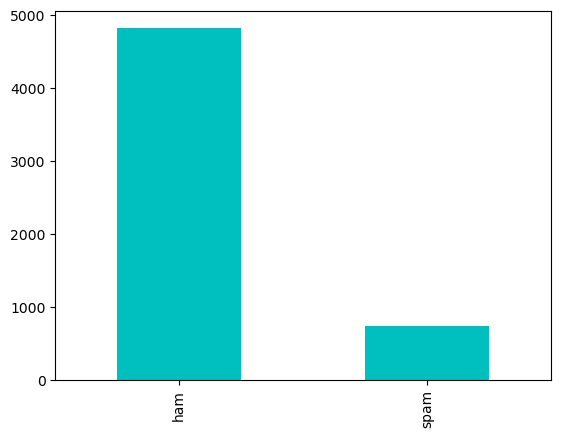

In [260]:
explode = (0.0, 0.2,) 

# Creating color parameters
colors = ( "cyan", "brown",)

Mail_type = ['Ham','Spam']
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(6, 10))
wedges, texts, autotexts = ax.pie(df['Mail_type'].value_counts().sort_values(ascending=False),
                                  autopct = lambda pct: func(pct,df['Mail_type'].value_counts().sort_values(ascending=False)[:5]),
                                  explode = explode,
                                  labels = Mail_type,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges,Mail_type,
          title ="Recieved_Mail_types",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Types of mail recieved")
 
plt.show()

df['Mail_type'].value_counts().plot.bar(color = 'c')

## <span style="color:#FF5733;"> Retrieve the most repeated words in mails </span>

In [261]:
Text = ' '.join(df['Mails'].values)
Text = re.sub(r'http\S+', '', Text)
Text = re.sub(r'@\S+', '', Text)
Text = re.sub(r'#\S+', '', Text)

In [262]:
words = Text.split()

In [263]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [264]:
word_counts = Counter(words)
top_words = word_counts.most_common()
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

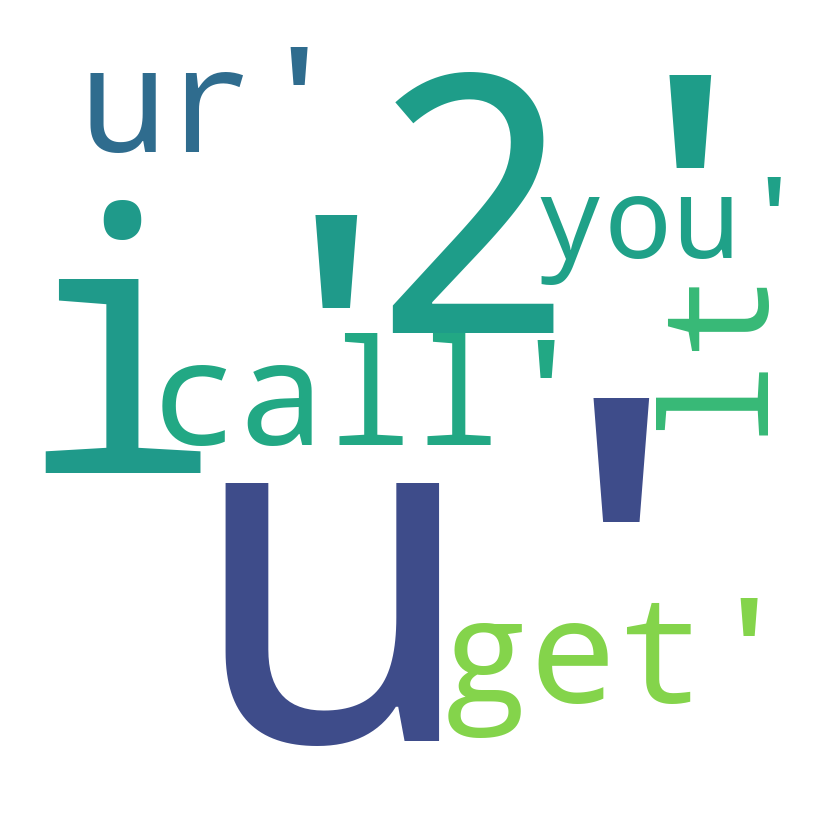

In [329]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

fig = go.Figure(data=[go.Bar(x=x_values, y=y_values)])
fig.update_layout(title='Most repeated Words in Recieved mails', xaxis_title='Word', yaxis_title='Frequency')

fig.show()

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the data
for val in top_words:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## <span style="color:#FF5733;"> Correcting the mails by word stemming,regular expression,stop words using NLP </span>

In [266]:
def clean_text(text):
  text = re.sub('<.*?>', '', text)
  text = re.sub('[^a-zA-Z]', ' ', text).lower()
  words = nltk.word_tokenize(text)
  words = [w for w in words if w not in stopwords.words('english')]
  stemmer = PorterStemmer()
  words = [stemmer.stem(w) for w in words]
  text = ' '.join(words)
  return text

In [267]:
%%time

tqdm.pandas()

df['corrected_texts'] = df['Mails'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: total: 44.4 s
Wall time: 53.5 s


In [268]:
df['corrected_texts'][:10]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
5    freemsg hey darl week word back like fun still...
6        even brother like speak treat like aid patent
7    per request mell mell oru minnaminungint nurun...
8    winner valu network custom select receivea pri...
9    mobil month u r entitl updat latest colour mob...
Name: corrected_texts, dtype: object

In [269]:
df

,Mail_type,Mails,corrected_texts
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5568,ham,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


## <span style="color:orange;">Applying Train-Test Split & Applying Regression Models, Evaluating Accuracy</span>

## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Logistic Regression Classifier</mark>, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [270]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [271]:
lr = LogisticRegression(random_state = 1)
model_lr = lr.fit(X_train,y_train)

In [272]:
predict_lr = model_lr.predict(X_test)
print(f"Logistic Regression:" ,accuracy_score(y_test,predict_lr))

Logistic Regression: 0.9865470852017937


In [273]:
y_pred_lr = lr.predict(X_test)

print(f" Logistic Regression Accuracy score:",accuracy_score(y_test, y_pred_lr))

 Logistic Regression Accuracy score: 0.9865470852017937


In [274]:
accuracy_lor = model_lr.score(X_test,y_test)
print(f"Logistic Regression Accuracy : {accuracy_lor}")

Logistic Regression Accuracy : 0.9865470852017937


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [275]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [276]:
lr = LogisticRegression(random_state = 42)
model_lr = lr.fit(X_train,y_train)


In [277]:
predict_lr = model_lr.predict(X_test)
print(f"Logistic Regression:" ,accuracy_score(y_test,predict_lr))

Logistic Regression: 0.9766816143497757


In [278]:
accuracy_lor_org = model_lr.score(X_test,y_test)
print(f"Logistic Regression Accuracy : {accuracy_lor_org}")

Logistic Regression Accuracy : 0.9766816143497757


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Decision Tree Classifier</mark>, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [279]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [280]:
dt = DecisionTreeClassifier(random_state = 42)
model_dt = dt.fit(X_train,y_train)


In [281]:
predict_dt = model_dt.predict(X_test)
print(f"Logistic Regression:" ,accuracy_score(y_test,predict_dt))

Logistic Regression: 0.9713004484304932


In [282]:
accuracy_dtc = model_dt.score(X_test,y_test)
print(f"Random Forest Classifier Accuracy: {accuracy_dtc}")

Random Forest Classifier Accuracy: 0.9713004484304932


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [283]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [284]:
dt = DecisionTreeClassifier(random_state = 42)
model_dt = dt.fit(X_train,y_train)


In [285]:
predict_dt = model_dt.predict(X_test)
print(f"Random forest classifier:" ,accuracy_score(y_test,predict_dt))

Random forest classifier: 0.9721973094170404


In [286]:
accuracy_dtc_org = model_dt.score(X_test,y_test)
print(f"Random Forest Classifier Accuracy: {accuracy_dtc_org}")

Random Forest Classifier Accuracy: 0.9721973094170404


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Random Forest Classifier</mark>, and Evaluating Accuracy</span>

 <code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [287]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [288]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_train, y_train)

In [289]:
predict_rf = model_rf.predict(X_test)
print(f"Logistic Regression:" ,accuracy_score(y_test,predict_rf))

Logistic Regression: 0.9766816143497757


In [290]:
accuracy_rfc = model_rf.score(X_test,y_test)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")

Random Forest Classifier Accuracy: 0.9766816143497757


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [291]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [292]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_train, y_train)


In [293]:
accuracy_rfc_org = model_rf.score(X_test,y_test)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc_org}")

Random Forest Classifier Accuracy: 0.9775784753363229


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Naive Bayes</mark>, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [294]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [295]:
nb= MultinomialNB()
model_nb = nb.fit(X_train, y_train)

In [296]:
accuracy_nb = model_nb.score(X_test,y_test)
print(f"Naive Bayes Accuracy Score: {accuracy_nb}")

Naive Bayes Accuracy Score: 0.9775784753363229


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [297]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [298]:
nb= MultinomialNB()
model_nb = nb.fit(X_train, y_train)

In [299]:
y_pred_nb = nb.predict(X_test)

In [300]:
accuracy_nb_org = model_nb.score(X_test,y_test)
print(f"Naive Bayes Accuracy Score: {accuracy_nb_org}")

Naive Bayes Accuracy Score: 0.9811659192825112


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>SVM</mark> model, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [301]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [302]:
svm = SVC(random_state=42)
model_svm = svm.fit(X_train, y_train)
model_svm

SVC(random_state=42)

In [303]:
accuracy_svm = model_svm.score(X_test,y_test)
print(f"SVM Accuracy score:", accuracy_svm)

SVM Accuracy score: 0.9775784753363229


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [304]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [305]:
svm = SVC(random_state=42)
model_svm = svm.fit(X_train, y_train)
model_svm

SVC(random_state=42)

In [306]:
y_pred_svm = svm.predict(X_test)

In [307]:
accuracy_svm_org = model_svm.score(X_test,y_test)
print(f"SVM Accuracy score:", accuracy_svm_org)

SVM Accuracy score: 0.979372197309417


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>Gradient Boosting Classifier</mark> model, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [308]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [309]:
gb = GradientBoostingClassifier(random_state=42)
model_gb = gb.fit(X_train, y_train)

model_gb

GradientBoostingClassifier(random_state=42)

In [310]:
accuracy_gb = model_gb.score(X_test,y_test)
print(f"Gradient boosting Classifier Accuracy score:", accuracy_gb)

Gradient boosting Classifier Accuracy score: 0.967713004484305


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [311]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [312]:
gb = GradientBoostingClassifier(random_state=42)
model_gb = gb.fit(X_train, y_train)

In [313]:
accuracy_gb_org = model_gb.score(X_test,y_test)
print(f"Gradient boosting Classifier Accuracy score:", accuracy_gb_org)

Gradient boosting Classifier Accuracy score: 0.9704035874439462


## <span style="font-family:candara">Executing a Train-Test Split,Applying <mark>XGB Classifier</mark> model, and Evaluating Accuracy</span>

<code style="background:yellow;color:black"> **Corected texts accuracy :** </code>

In [314]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['corrected_texts']).toarray()

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [315]:
import xgboost as xgb

In [316]:
xgb= xgb.XGBClassifier(random_state=42)

y_train_binary = y_train.apply(lambda label: 1 if label == 'spam' else 0)
y_test_binary = y_test.apply(lambda label: 1 if label == 'spam' else 0) 

model_xgb = xgb.fit(X_train, y_train_binary)

In [317]:
accuracy_xgb = model_xgb.score(X_test,y_test_binary)
print(f"XGB Classifier Accuracy score:", accuracy_xgb)

XGB Classifier Accuracy score: 0.9775784753363229


<code style="background:black;color:cyan"> **Original mail texts accuracy :** </code>

In [318]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df['Mails'])

y = df['Mail_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [319]:
import xgboost as xgb

In [320]:
xgb= xgb.XGBClassifier(random_state=42)

y_train_binary = y_train.apply(lambda label: 1 if label == 'spam' else 0)
y_test_binary = y_test.apply(lambda label: 1 if label == 'spam' else 0) 

model_xgb = xgb.fit(X_train, y_train_binary)

In [321]:
accuracy_xgb_org = model_xgb.score(X_test,y_test_binary)
print(f"XGB Classifier Accuracy score:", accuracy_xgb_org)

XGB Classifier Accuracy score: 0.9739910313901345


## <span style="color:#FF5733;"> Comparing the Regression models Accuracy Score to Finalize the correct Model</span>

### <mark> Accuracy score for X variable as Corrected Texts using NLP </mark>

In [322]:
print("{:<25} {:<10}".format('Algorithm', 'Accuracy'))
print("-----------------------------------------------")

algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_nb, accuracy_rfc, accuracy_svm, accuracy_lor, accuracy_dtc, accuracy_gb, accuracy_xgb]

for name, accuracy in zip(algorithm_names, accuracies):
    print("{:<25} {:<10.2f}%".format(name, accuracy * 100))

Algorithm                 Accuracy  
-----------------------------------------------
Naive Bayes               97.76     %
Random Forest             97.67     %
SVM                       97.76     %
Logistic Regression       98.65     %
Decision Tree             97.13     %
Gradient Boosting         96.77     %
XGBoost                   97.76     %


### <mark> Accuracy score for X variable as Normal texts recieved in the mail </mark>

In [323]:
print("{:<25} {:<10}".format('Algorithm', 'Accuracy'))
print("-----------------------------------------------")

algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies1= [accuracy_nb_org, accuracy_rfc_org, accuracy_svm_org, accuracy_lor_org, accuracy_dtc_org, accuracy_gb_org, accuracy_xgb_org]

for name, accuracy in zip(algorithm_names, accuracies1):
    print("{:<25} {:<10.2f}%".format(name, accuracy * 100))

Algorithm                 Accuracy  
-----------------------------------------------
Naive Bayes               98.12     %
Random Forest             97.76     %
SVM                       97.94     %
Logistic Regression       97.67     %
Decision Tree             97.22     %
Gradient Boosting         97.04     %
XGBoost                   97.40     %


In [324]:
algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_nb, accuracy_rfc, accuracy_svm, accuracy_lor, accuracy_dtc, accuracy_gb, accuracy_xgb]

fig = go.Figure()

fig.add_trace(go.Scatter(x=algorithm_names, y=accuracies, mode='lines+markers'))

fig.update_layout(
    title='Comparison of Machine Learning Algorithms used for Accuracy prediction in Corrected texts',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy',
    xaxis_tickangle=35,
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()

In [325]:
algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies1 = [accuracy_nb_org, accuracy_rfc_org, accuracy_svm_org, accuracy_lor_org, accuracy_dtc_org, accuracy_gb_org, accuracy_xgb_org]

fig = go.Figure()

fig.add_trace(go.Scatter(x=algorithm_names, y=accuracies1, mode='lines+markers'))

fig.update_layout(
    title='Comparison of Machine Learning Algorithms used for Accuracy prediction in Normal texts Recieved',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy',
    xaxis_tickangle=30,
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()

###  From this analysis we can come with the conclude that corrected texts accuracy is slightly higher than normal texts.Naive Bayes, SVM and XGBoost classifiers are performing consistently well with high accuracy (above 97%).Logistic Regression model performing more accgurately than the others with (98% and above)

## <span style="color:#FF5733;"> Performance of the model with high accuracy</span>

In [326]:
ytest = np.array(y_test)
print(classification_report(model_lr.predict(X_test),ytest))
conf_matrix=confusion_matrix(model_lr.predict(X_test),ytest)
print(confusion_matrix(model_lr.predict(X_test),ytest))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       987
        spam       0.84      0.98      0.91       128

    accuracy                           0.98      1115
   macro avg       0.92      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[963  24]
 [  2 126]]


## <span style="color:#FF5733;"> Confussion matrix </span>

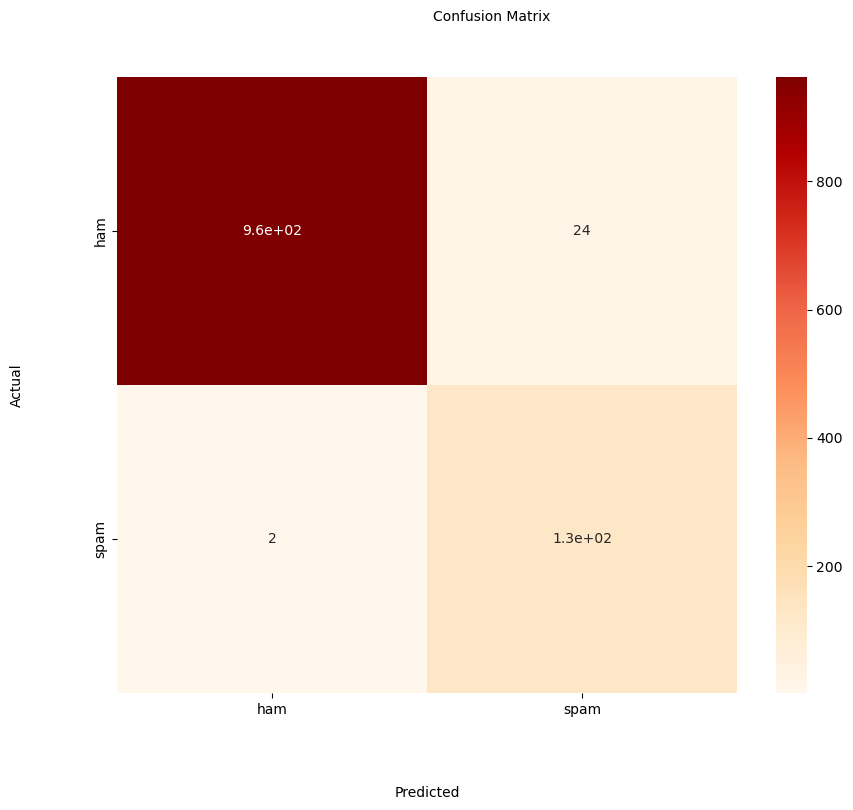

In [327]:
class_names = ['ham','spam']
conf_matrix = confusion_matrix(model_lr.predict(X_test),ytest)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='OrRd', cbar=True,
            xticklabels=class_names, yticklabels=class_names)

plt.figtext(0.5, 0.95, 'Confusion Matrix', ha='center')

plt.ylabel('Actual',labelpad=50)
plt.xlabel('Predicted',labelpad = 50)

plt.show()